# LendingClub Case Study

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline

## 1. Reading & Understanding the data

### 1.1 Importing the input files

In [99]:
df = pd.read_csv("loan.csv")
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_20328\1514191623.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,54734,80364,25000,25000,19080.057200,36 months,11.89%,829.10,B,B4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,55742,114426,7000,7000,672.803839,36 months,10.71%,228.22,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,57245,138150,1200,1200,1200.000000,36 months,13.11%,40.50,C,C2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,57416,139635,10800,10800,10691.551050,36 months,13.57%,366.86,C,C3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,58915,153417,7500,5025,557.087228,36 months,10.08%,162.34,B,B3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### 1.2 Inspect Data Frames

In [100]:
# Database dimension
print("Database dimension - df     :",df.shape)

#Database size
print("Database size - df          :",df.size)


Database dimension - df     : (39717, 111)
Database size - df          : 4408587


In [101]:
# Database column types
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [102]:
# Checking the numeric variables of the dataframes
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## 2. Data Cleaning & Manipulation

### 2.1 DF Missing values

In [103]:
# installing required library
!pip install missingno

<Axes: >

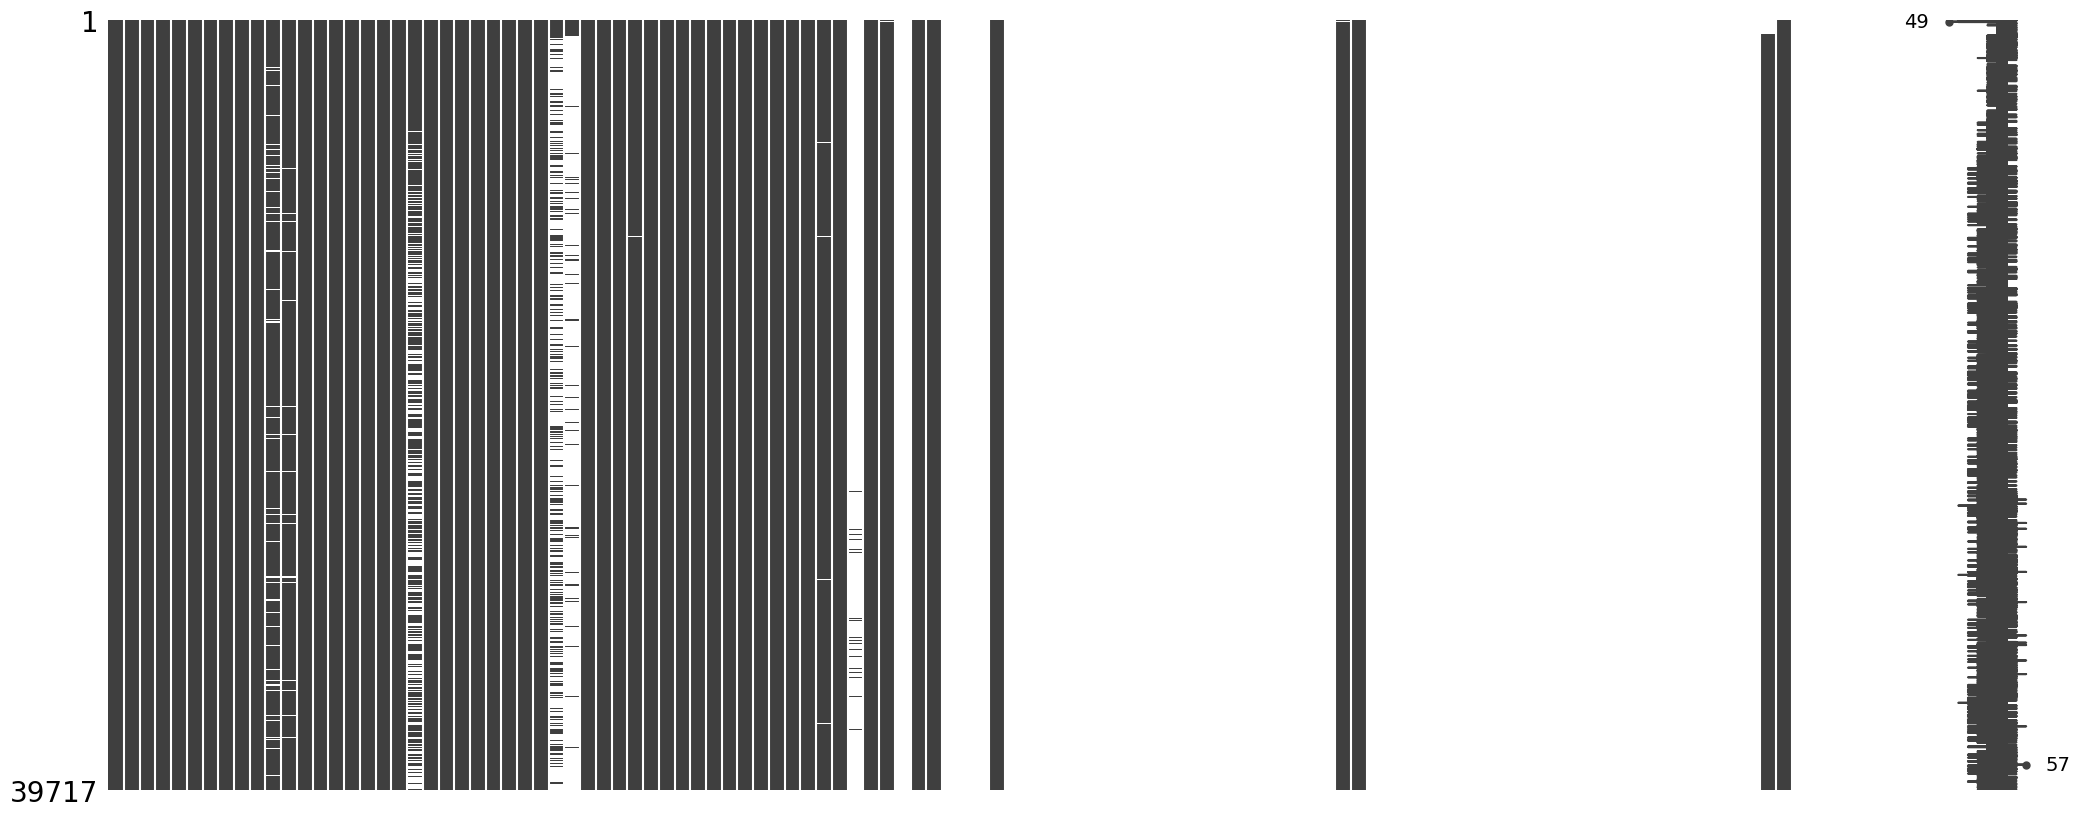

In [104]:
import missingno as mn
mn.matrix(df)

In [105]:
# % null value in each column
round(df.isnull().sum() / df.shape[0] * 100.00,2)


id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

<div style="background-color: lightblue; padding: 10px; color: black">
Insight:<br>
There are many columns in dataframe where missing value is more than 40%. Let's plot the columns vs missing value % with 40% being the cut-off marks
</div>

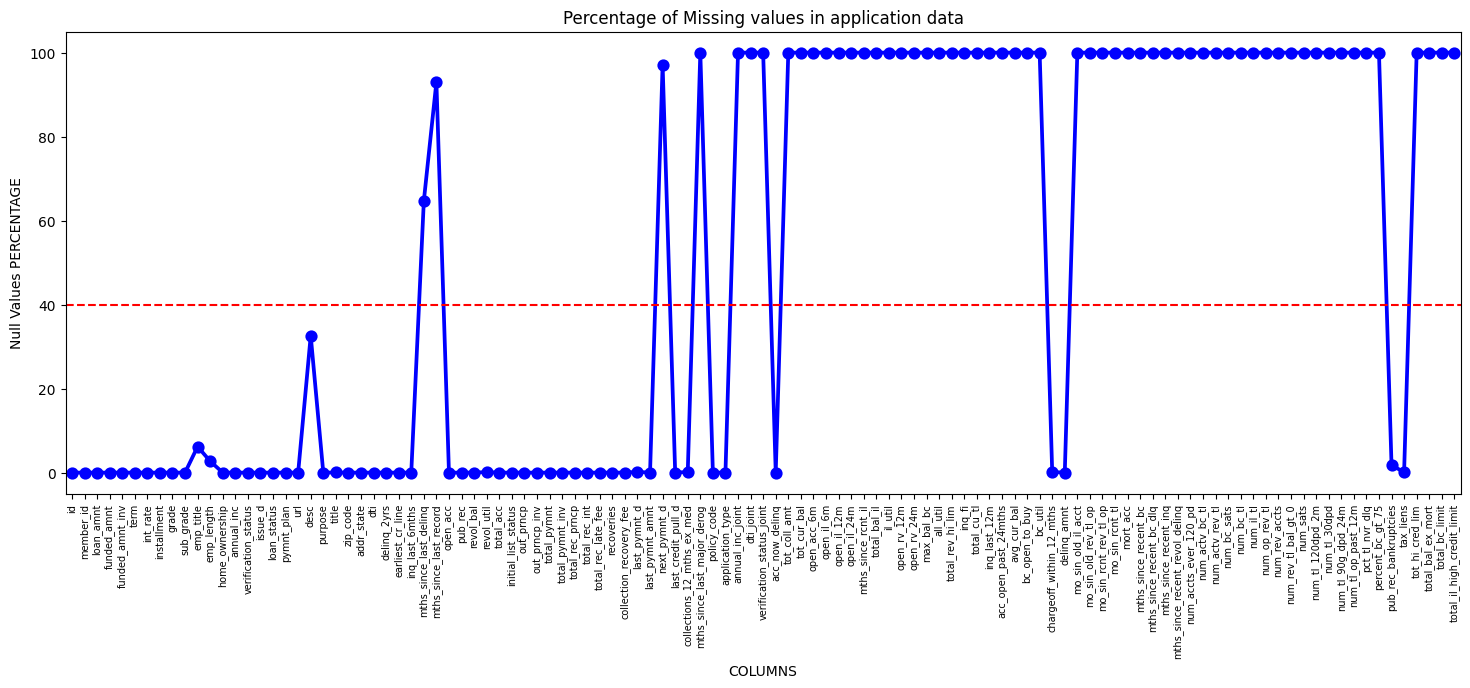

In [106]:
null_df = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
null_df.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_df,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

<div style="background-color: lightblue; padding: 10px; color: black">
Insight:<br>
From the plot we can see the columns in which percentage of null values more than 40% are marked above the red line and the columns which have less than 40 % null values below the red line. Let's check the columns which has more than 40% missing values

In [107]:
# more than or equal to 40% empty rows columns
nullcol_40_columns = null_df[null_df["Null Values Percentage"]>=40]
nullcol_40_columns

,Column Name,Null Values Percentage
28,mths_since_last_delinq,64.662487
29,mths_since_last_record,92.985372
47,next_pymnt_d,97.129693
50,mths_since_last_major_derog,100.000000
53,annual_inc_joint,100.000000
54,dti_joint,100.000000
55,verification_status_joint,100.000000
57,tot_coll_amt,100.000000
58,tot_cur_bal,100.000000
59,open_acc_6m,100.000000


In [108]:
# How many columns have more than or euqal to 40% null values ?
len(nullcol_40_application)

57

<div style="background-color: lightblue; padding: 10px; color: black">
Insight:<br>
Total of 57 columns are there which have more than 40% null values.

## 3. Analyze & Delete unwanted Columns in DF

In [109]:
# create a list of columns that needs to be dropped including the columns with >40% null values
Unwanted_columns = nullcol_40_columns["Column Name"].tolist()
 
len(Unwanted_columns)

57

<div style="background-color: lightblue; padding: 10px; color: black">
Insight:<br>
Total 57 columns can be deleted from DF.

In [110]:
# Dropping the unnecessary columns from applicationDF
df.drop(labels=Unwanted_application,axis=1,inplace=True)

In [111]:
# Inspecting the dataframe after removal of unnecessary columns
df.shape

(39717, 54)

In [112]:
# inspecting the column types after removal of unnecessary columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

<div style="background-color: lightblue; padding: 10px; color: black">
Insight:<br>
After deleting unwanted columns, there are 53 columns remaining in DF.

## 4. Standardize Values

Strategy for DF:<br>

1. Categorize the amount variables into bins
2. Convert few columns to categorical

In [113]:
# Binning Numerical Columns to create a categorical column

# Creating bins for income amount
df['annual_inc']=df['annual_inc']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11,12]
slot = ['0-5K','5K-10K','10K-20K','20K-30K','30K-40K','40K-50K', 
        '50k-60k','60k-70k','70k-80k','80k-90k','90k-100k',
        '100K Above']

df['annual_inc_RANGE']=pd.cut(df['annual_inc'],bins,labels=slot)

In [114]:
df['annual_inc_RANGE'].value_counts(normalize=True)*100

annual_inc_RANGE
0-5K          85.698456
5K-10K        12.845954
10K-20K        1.035030
20K-30K        0.209021
30K-40K        0.062958
40K-50K        0.045330
60k-70k        0.040293
50k-60k        0.027702
70k-80k        0.017628
100K Above     0.012592
80k-90k        0.002518
90k-100k       0.002518
Name: proportion, dtype: float64

<div style="background-color: lightblue; padding: 10px; color: black">
Insight:<br>
More than 12% loan applicants have income amount in the range of 5K-10K. Almost 85% loan applicants have income less than 5K.

In [115]:
# Creating bins for Credit amount
df['funded_amnt']=df['funded_amnt']/10000

bins = [0,1,2,3,4,5,6,7,8,9,10,11,12]
slot = ['0-5K','5K-10K','10K-20K','20K-30K','30K-40K','40K-50K', 
        '50k-60k','60k-70k','70k-80k','80k-90k','90k-100k',
        '100K Above']

df['funded_amnt_RANGE']=pd.cut(df['funded_amnt'],bins=bins,labels=slot)

In [116]:
#checking the binning of data and % of data in each category
df['funded_amnt_RANGE'].value_counts(normalize=True)*100

funded_amnt_RANGE
0-5K          57.436362
5K-10K        32.165068
10K-20K        8.671350
20K-30K        1.727220
30K-40K        0.000000
40K-50K        0.000000
50k-60k        0.000000
60k-70k        0.000000
70k-80k        0.000000
80k-90k        0.000000
90k-100k       0.000000
100K Above     0.000000
Name: proportion, dtype: float64

<div style="background-color: lightblue; padding: 10px; color: black">
Insight:<br>
More than 57% of loan applicants have received loan amount upto 5k. <br>
32% of loan applicants have received loan amount between 5k-10k.<br>
more than 10% of loan applicants have received loan amount more than 10K.<br>

In [117]:
#Checking the number of unique values each column possess to identify categorical columns
df.nunique().sort_values()

pymnt_plan                        1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
tax_liens                         1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
application_type                  1
term                              2
loan_status                       3
verification_status               3
pub_rec_bankruptcies              3
funded_amnt_RANGE                 4
home_ownership                    5
pub_rec                           5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
annual_inc_RANGE                 12
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                

## 5. Data Type Conversion

In [118]:
# inspecting the column types if they are in correct data type using the above result.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          39717 non-null  int64   
 1   member_id                   39717 non-null  int64   
 2   loan_amnt                   39717 non-null  int64   
 3   funded_amnt                 39717 non-null  float64 
 4   funded_amnt_inv             39717 non-null  float64 
 5   term                        39717 non-null  object  
 6   int_rate                    39717 non-null  object  
 7   installment                 39717 non-null  float64 
 8   grade                       39717 non-null  object  
 9   sub_grade                   39717 non-null  object  
 10  emp_title                   37258 non-null  object  
 11  emp_length                  38642 non-null  object  
 12  home_ownership              39717 non-null  object  
 13  annual_inc      

Insight:
Numeric columns are already in int64 and float64 format. Hence proceeding with other columns.

In [136]:
# checking the null value % of each column in df dataframe
round(df.isnull().sum() / df.shape[0] * 100.00,2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.59
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [120]:
df['tax_liens'].describe()

count    39678.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: tax_liens, dtype: float64

In [121]:
df['tax_liens'].fillna((df['tax_liens'].mode()[0]),inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_20328\1693250488.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tax_liens'].fillna((df['tax_liens'].mode()[0]),inplace = True)


## 6. Identifying the outliers

Finding outlier information in DF

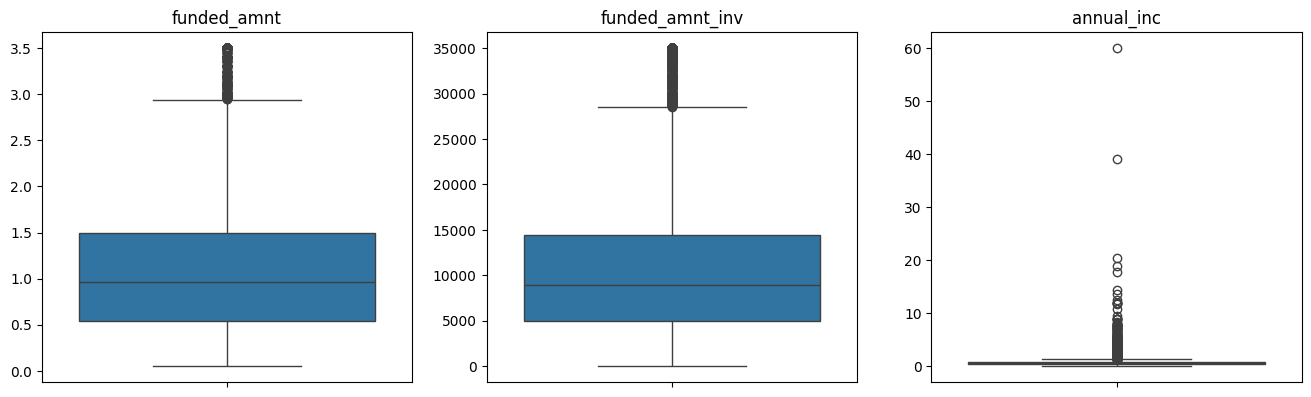

In [122]:
plt.figure(figsize=(22,10))

app_outlier_col_1 = ['funded_amnt', 'funded_amnt_inv', 'annual_inc']
#app_outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=df[i[1]])
    plt.title(i[1])
    plt.ylabel("")




<div style="background-color: lightblue; padding: 10px; color: black">
Insight:<br>

Funded_amnt, Funded_amnt_inv has huge number of outliers which indicate that few of the loan applicants have received high loan amount.<br>
annual_inc column has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.


We can see the stats for these columns below as well.

In [123]:
df[['funded_amnt', 'funded_amnt_inv', 'annual_inc']].describe()

,funded_amnt,funded_amnt_inv,annual_inc
count,39717.000000,39717.000000,39717.000000
mean,1.094771,10397.448868,0.689689
std,0.718724,7128.450439,0.637938
min,0.050000,0.000000,0.040000
25%,0.540000,5000.000000,0.404040
50%,0.960000,8975.000000,0.590000
75%,1.500000,14400.000000,0.823000
max,3.500000,35000.000000,60.000000


## 6. Data Analysis

Strategy:
The data analysis flow has been planned in following way :



In [124]:
#Converting Categorical columns from Object to categorical 
Catgorical_col_p = ['grade','sub_grade','emp_length',
                    'home_ownership','verification_status','loan_status','addr_state']

In [125]:
# inspecting the column types after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          39717 non-null  int64   
 1   member_id                   39717 non-null  int64   
 2   loan_amnt                   39717 non-null  int64   
 3   funded_amnt                 39717 non-null  float64 
 4   funded_amnt_inv             39717 non-null  float64 
 5   term                        39717 non-null  object  
 6   int_rate                    39717 non-null  object  
 7   installment                 39717 non-null  float64 
 8   grade                       39717 non-null  object  
 9   sub_grade                   39717 non-null  object  
 10  emp_title                   37258 non-null  object  
 11  emp_length                  38642 non-null  object  
 12  home_ownership              39717 non-null  object  
 13  annual_inc      

In [126]:
for col in Catgorical_col_p:
    df[col] =pd.Categorical(df[col])

### 5.1 Plotting Functions

Following are the common functions customized to perform uniform anaysis that is called for all plots:

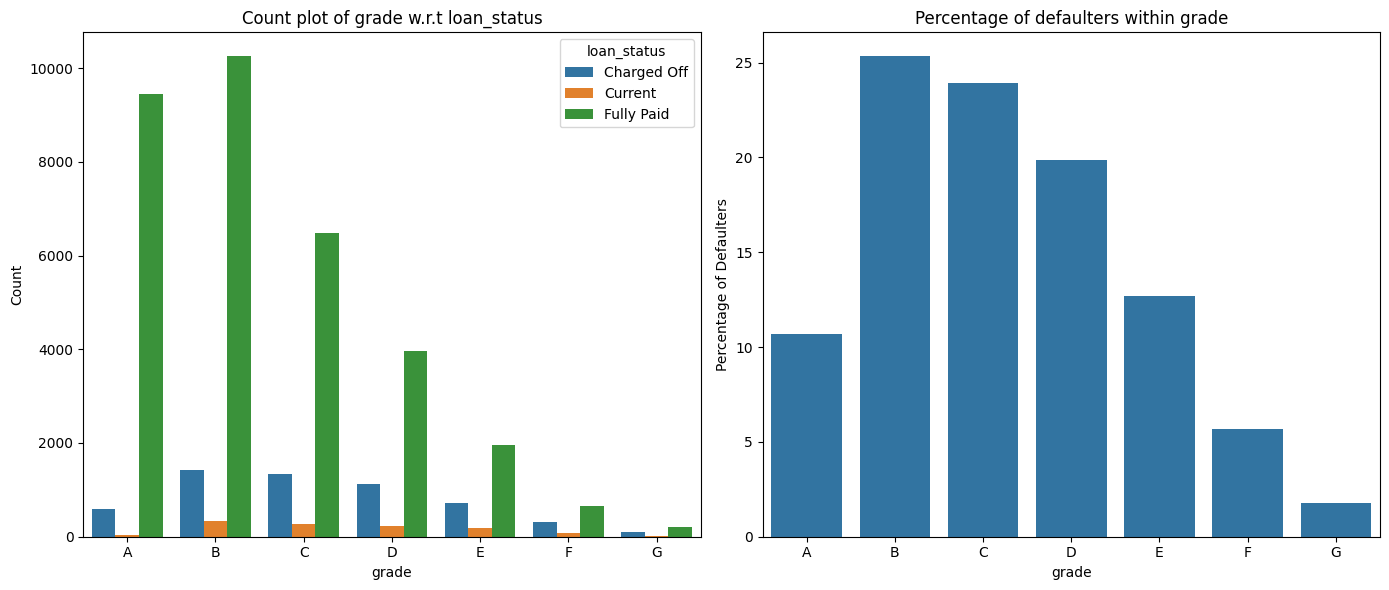

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def univariate_categorical_analysis(df, column):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Count plot of categorical column w.r.t loan_status
    sns.countplot(data=df, x=column, hue='loan_status', ax=axes[0])
    axes[0].set_title(f'Count plot of {column} w.r.t loan_status')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Count')

    # Percentage of defaulters within column
    defaulter_percentage = df[df['loan_status'] == 'Charged Off'][column].value_counts(normalize=True) * 100
    sns.barplot(x=defaulter_percentage.index, y=defaulter_percentage.values, ax=axes[1])
    axes[1].set_title(f'Percentage of defaulters within {column}')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Percentage of Defaulters')

    plt.tight_layout()
    plt.show()

# Example usage with a sample DataFrame

univariate_categorical_analysis(df, 'grade')

<div style="background-color: lightblue; padding: 10px; color: black">
Insight:<br>
We can see that loan applicant with grade B are the highest defaulters.

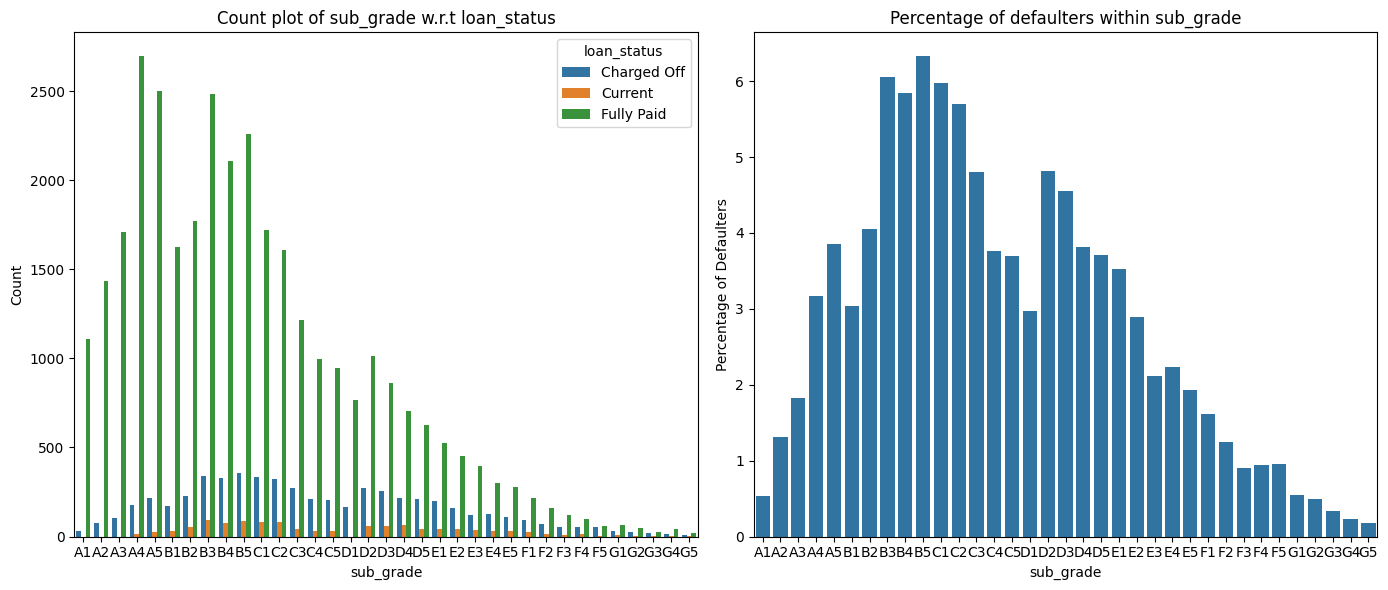

In [129]:
univariate_categorical_analysis(df, 'sub_grade')

<div style="background-color: lightblue; padding: 10px; color: black">
Insight:<br>
Sub-grades B and C being the highest defaulters suggests that these borrowers might have moderate credit risk. However, the fact that sub-grade B5 has the highest percentage of defaulters indicates that within the B grade, B5 is particularly risky.

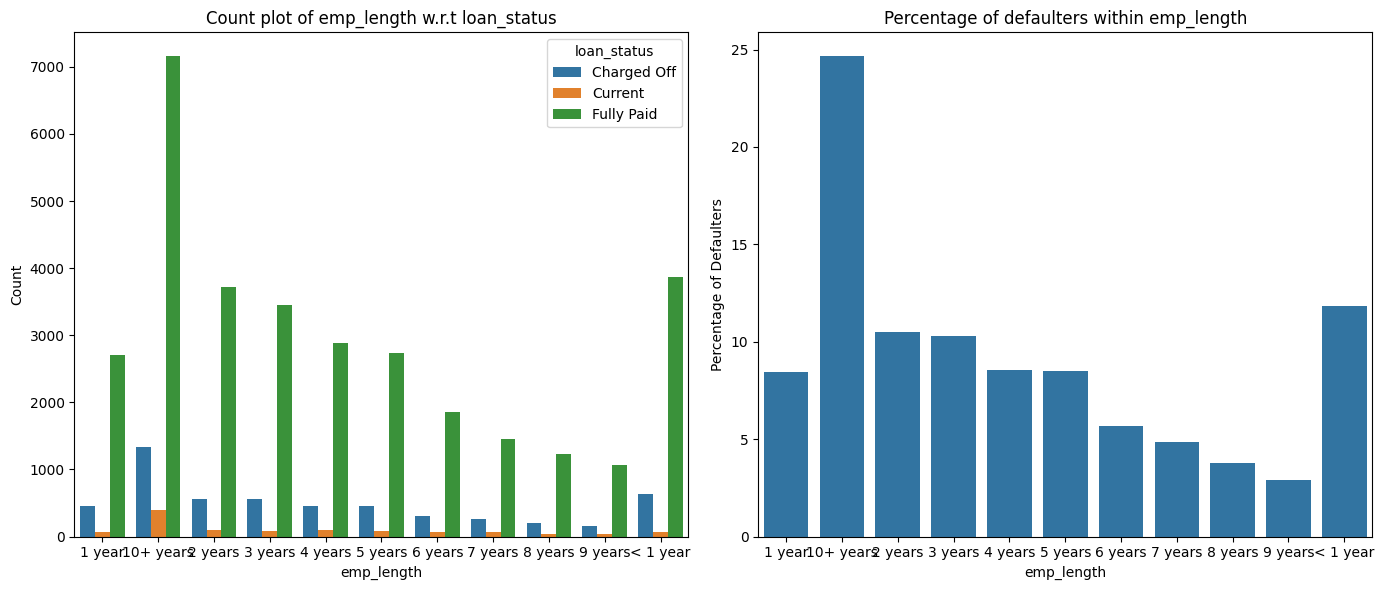

In [130]:
univariate_categorical_analysis(df, 'emp_length')

<div style="background-color: lightblue; padding: 10px; color: black">
Insight:<br>
We can see loan applicant with 10+ years of experience are the highest defaulters.

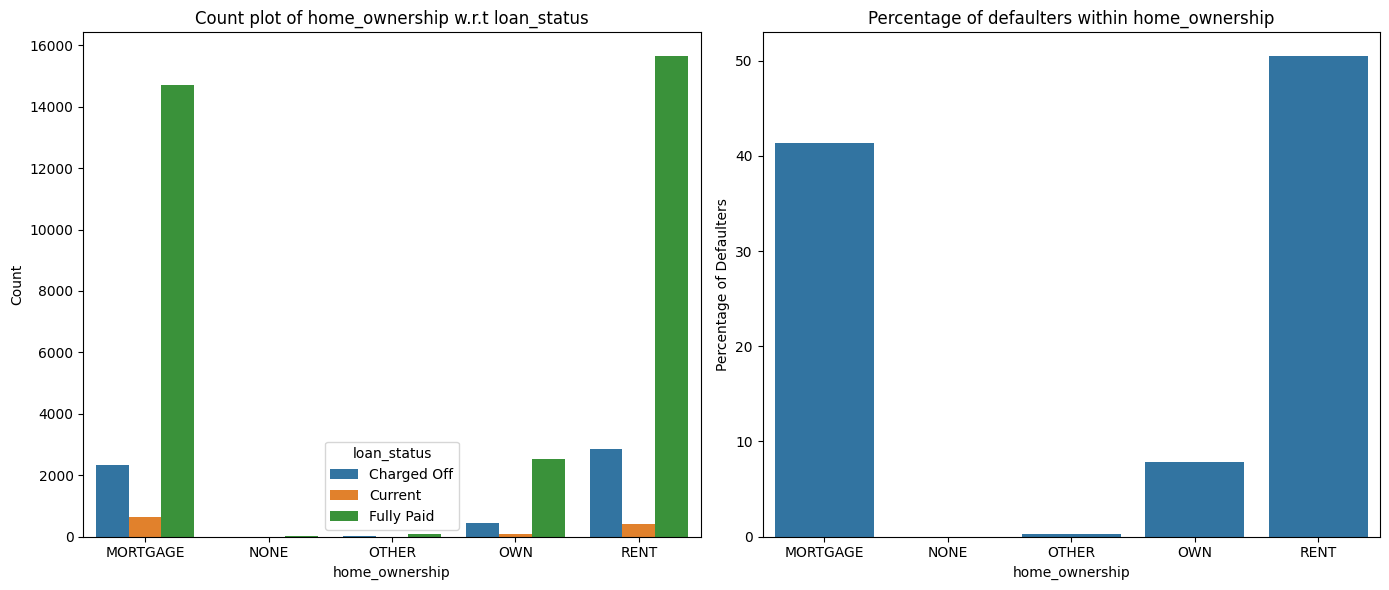

In [131]:
univariate_categorical_analysis(df, 'home_ownership')


<div style="background-color: lightblue; padding: 10px; color: black">
Insight:<br>
We can see loan applicant living in rented/mortage house are the highest defaulters.

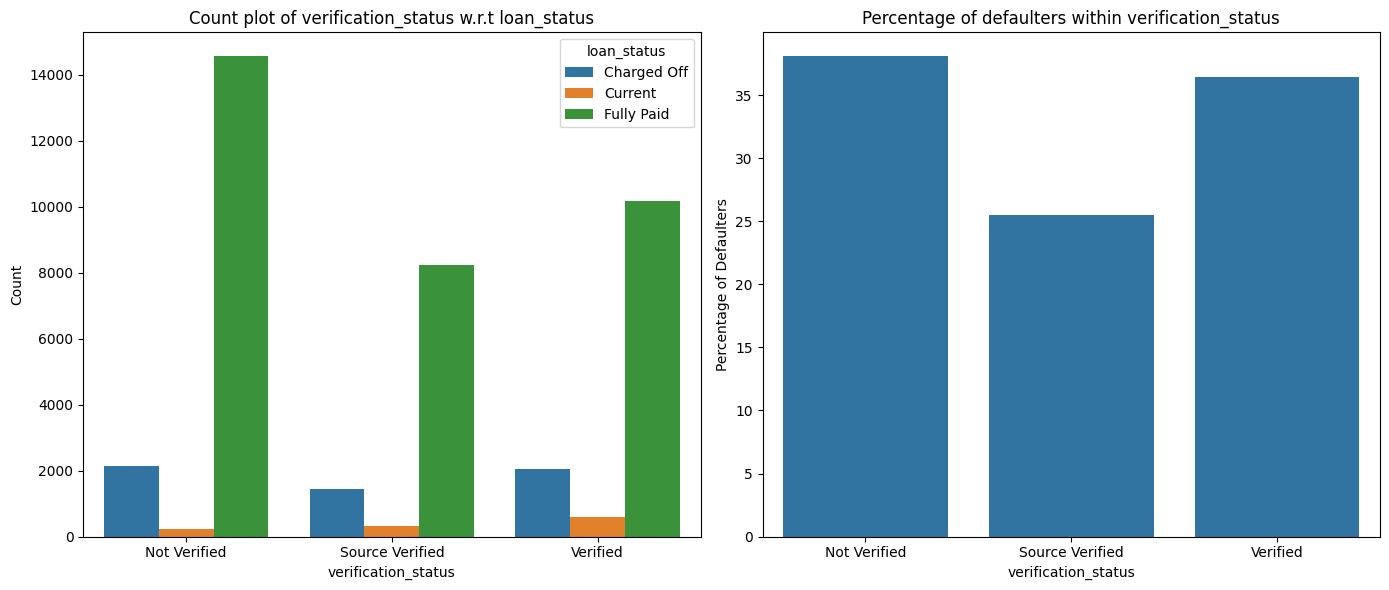

In [132]:
univariate_categorical_analysis(df, 'verification_status')


<div style="background-color: lightblue; padding: 10px; color: black">
Insight:<br>
We can see loan applicant who are 'not verified' are the highest defaulters.

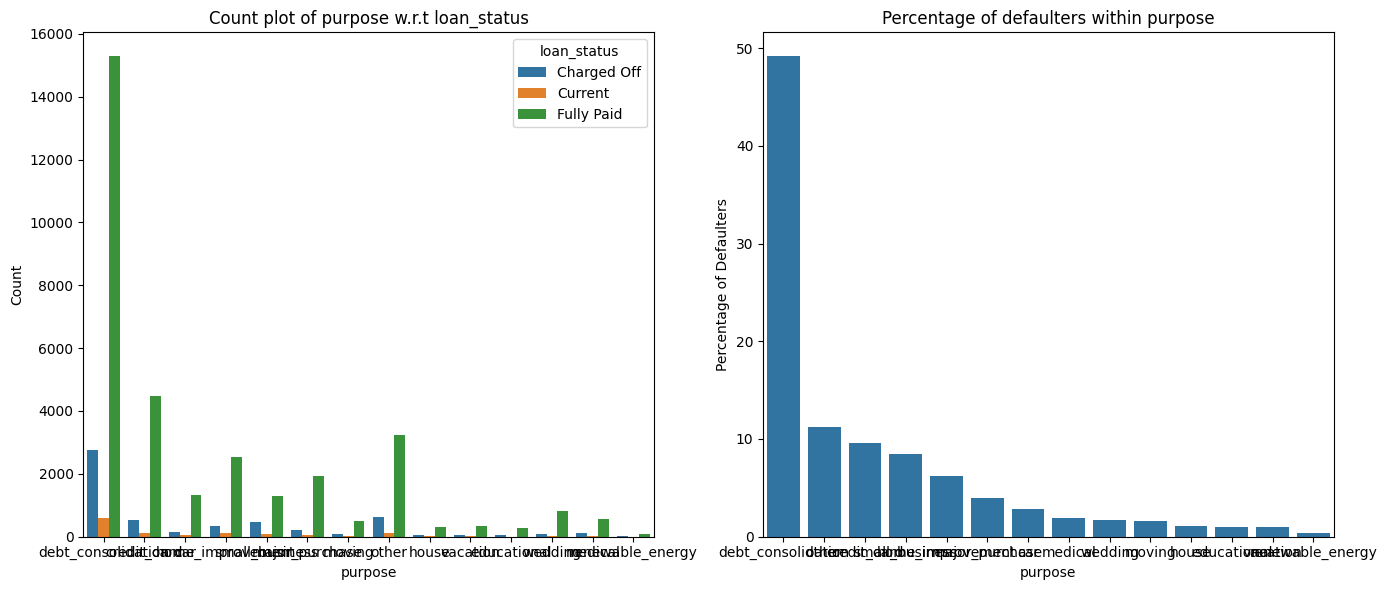

In [133]:
univariate_categorical_analysis(df, 'purpose')

<div style="background-color: lightblue; padding: 10px; color: black">
Insight:<br>
We can see loan applicant whose loan purpose is releated to 'debt_consolidation' are the highest defaulters.

5.2 Categorical Bi/Multivariate Analysis

In [134]:
df.groupby('loan_status')['annual_inc'].describe()

C:\Users\user\AppData\Local\Temp\ipykernel_20328\4753986.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('loan_status')['annual_inc'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,0.624273,0.477760,0.0408,0.370000,0.53,0.75,12.5
Current,1140.0,0.754307,0.467754,0.0996,0.474750,0.65,0.90,6.5
Fully Paid,32950.0,0.698625,0.665622,0.0400,0.411328,0.60,0.84,60.0


5.3 Numeric Variables Analysis

In [259]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'annual_inc_RANGE',
       'funded_amnt_RANGE'],
      dtype='object')

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          39717 non-null  int64   
 1   member_id                   39717 non-null  int64   
 2   loan_amnt                   39717 non-null  int64   
 3   funded_amnt                 39717 non-null  float64 
 4   funded_amnt_inv             39717 non-null  float64 
 5   term                        39717 non-null  object  
 6   int_rate                    39717 non-null  object  
 7   installment                 39717 non-null  float64 
 8   grade                       39717 non-null  category
 9   sub_grade                   39717 non-null  category
 10  emp_title                   37258 non-null  object  
 11  emp_length                  38642 non-null  category
 12  home_ownership              39717 non-null  category
 13  annual_inc      

5.4 Correlation between numeric variable

In [ ]:
# Function to identify and handle non-numeric values
def handle_non_numeric(df):
    for column in df.columns:
        if df[column].dtype == object:
            try:
                df[column] = pd.to_numeric(df[column])
            except ValueError:
                print(f"Column '{column}' contains non-numeric values and will be handled.")
                # Convert non-numeric values to NaN
                df[column] = pd.to_numeric(df[column], errors='coerce')
        elif df[column].dtype == 'O':
            # Removing '%' and converting to float for columns with percentage values
            df[column] = df[column].str.rstrip('%').astype(float)
    return df

# Handling non-numeric values
df = handle_non_numeric(df)

# Display the DataFrame after handling non-numeric values
print(df)

Column 'term' contains non-numeric values and will be handled.
Column 'int_rate' contains non-numeric values and will be handled.
Column 'emp_title' contains non-numeric values and will be handled.
Column 'issue_d' contains non-numeric values and will be handled.
Column 'pymnt_plan' contains non-numeric values and will be handled.
Column 'url' contains non-numeric values and will be handled.
Column 'desc' contains non-numeric values and will be handled.
Column 'purpose' contains non-numeric values and will be handled.
Column 'title' contains non-numeric values and will be handled.
Column 'zip_code' contains non-numeric values and will be handled.
Column 'earliest_cr_line' contains non-numeric values and will be handled.
Column 'revol_util' contains non-numeric values and will be handled.
Column 'initial_list_status' contains non-numeric values and will be handled.
Column 'last_pymnt_d' contains non-numeric values and will be handled.
Column 'last_credit_pull_d' contains non-numeric val

In [140]:
# Bifurcating the DataFrame based on loan_status
df_fully_paid = df[df['loan_status'] == 'Fully Paid']
df_charged_off = df[df['loan_status'] == 'Charged Off']


# Dropping non-numeric columns that cannot be converted
columns_to_drop = ['grade', 'sub_grade', 'title', 'emp_title', 'loan_status','emp_length', 'home_ownership', 'verification_status', 
                   'issue_d', 'purpose', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 
                   'last_pymnt_d', 'last_credit_pull_d', 'annual_inc_RANGE', 'funded_amnt_RANGE', 
                   'term', 'int_rate', 'url', 'desc', 'pymnt_plan', 'initial_list_status', 'out_prncp', 
                   'out_prncp_inv', 'tax_liens', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 
                   'chargeoff_within_12_mths', 'acc_now_delinq'
                    'delinq_amnt', 'recoveries', 'collection_recovery_fee' ]
df_fully_paid = df_fully_paid.drop(columns=[col for col in columns_to_drop if col in df_fully_paid.columns])
df_charged_off = df_charged_off.drop(columns=[col for col in columns_to_drop if col in df_charged_off.columns])

# Correlation analysis for Fully Paid Loans
correlation_fully_paid = df_fully_paid.corr()
print("Correlation matrix for Fully Paid Loans:")
print(correlation_fully_paid)

# Correlation analysis for Charged Off Loans
correlation_charged_off = df_charged_off.corr()
print("Correlation matrix for Charged Off Loans:")
print(correlation_charged_off)

Correlation matrix for Fully Paid Loans:
                            id  member_id  loan_amnt  funded_amnt  \
id                    1.000000   0.993406   0.111476     0.121762   
member_id             0.993406   1.000000   0.112402     0.121846   
loan_amnt             0.111476   0.112402   1.000000     0.982292   
funded_amnt           0.121762   0.121846   0.982292     1.000000   
funded_amnt_inv       0.214544   0.224726   0.944587     0.962434   
installment           0.073527   0.069551   0.934364     0.959605   
annual_inc            0.009815   0.010865   0.264433     0.260073   
dti                   0.086353   0.087827   0.059256     0.059677   
delinq_2yrs          -0.011513  -0.010989  -0.033926    -0.034259   
inq_last_6mths       -0.040700  -0.045719   0.008961     0.009019   
open_acc              0.016293   0.014428   0.176928     0.175598   
pub_rec              -0.014965  -0.014632  -0.054566    -0.053935   
revol_bal             0.004280   0.001547   0.315131     0.309

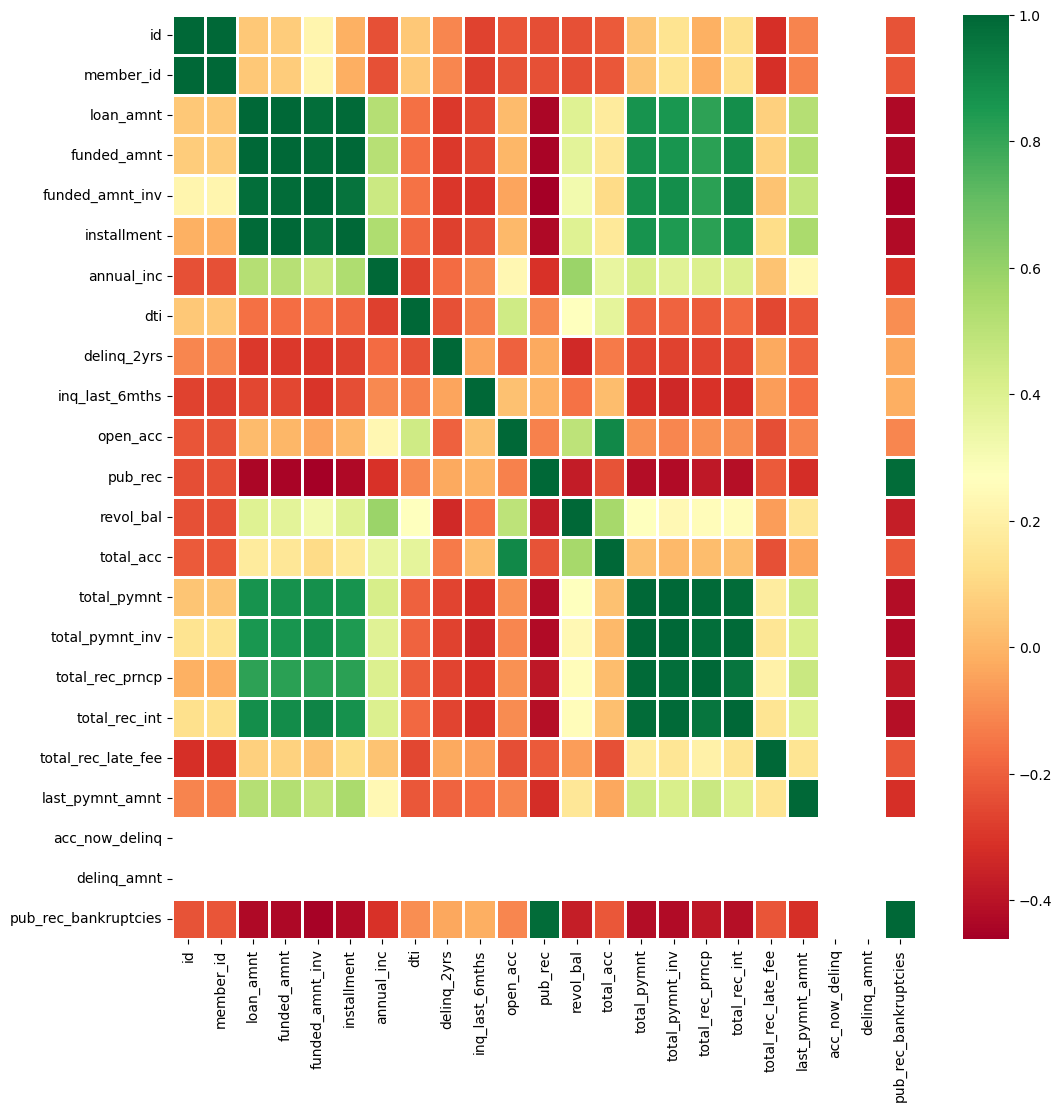

In [141]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(correlation_charged_off.corr(), cmap="RdYlGn",annot=False,linewidth =1)

<div style="background-color: lightblue; padding: 10px; color: black">
Insights:<br>
Correlating factors amongst Charged_off and other fields:<br>
1. loan_amnt, funded_amnt, funded_amnt_inv & installment is highly co-relating with total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int.<br>
2. total_acc is highly correlated with open_acc.


# To update below factors based on above outcomes

In [ ]:
Decisive Factor whether an applicant will be Defaulter:
CODE_GENDER: Men are at relatively higher default rate
NAME_FAMILY_STATUS : People who have civil marriage or who are single default a lot.
NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary education
NAME_INCOME_TYPE: Clients who are either at Maternity leave OR Unemployed default a lot.
REGION_RATING_CLIENT: People who live in Rating 3 has highest defaults.
OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as the default rate is huge.
ORGANIZATION_TYPE: Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.
DAYS_BIRTH: Avoid young people who are in age group of 20-40 as they have higher probability of defaulting
DAYS_EMPLOYED: People who have less than 5 years of employment have high default rate.
CNT_CHILDREN & CNT_FAM_MEMBERS: Client who have children equal to or more than 9 default 100% and hence their applications are to be rejected.
AMT_GOODS_PRICE: When the credit amount goes beyond 3M, there is an increase in defaulters.
The following attributes indicate that people from these category tend to default but then due to the number of people and the amount of loan, the bank could provide loan with higher interest to mitigate any default risk thus preventing business loss:

NAME_HOUSING_TYPE: High number of loan applications are from the category of people who live in Rented apartments & living with parents and hence offering the loan would mitigate the loss if any of those default.
AMT_CREDIT: People who get loan for 300-600k tend to default more than others and hence having higher interest specifically for this credit range would be ideal.
AMT_INCOME: Since 90% of the applications have Income total less than 300,000 and they have high probability of defaulting, they could be offered loan with higher interest compared to other income category.
CNT_CHILDREN & CNT_FAM_MEMBERS: Clients who have 4 to 8 children has a very high default rate and hence higher interest should be imposed on their loans.
NAME_CASH_LOAN_PURPOSE: Loan taken for the purpose of Repairs seems to have highest default rate. A very high number applications have been rejected by bank or refused by client in previous applications as well which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected, or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan. The same approach could be followed in future as well.
Other suggestions:
90% of the previously cancelled client have actually repayed the loan. Record the reason for cancellation which might help the bank to determine and negotiate terms with these repaying customers in future for increase business opportunity.
88% of the clients who were refused by bank for loan earlier have now turned into a repaying client. Hence documenting the reason for rejection could mitigate the business loss and these clients could be contacted for further loans.